In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datin=pd.read_csv("C:/Users/pc/Documents/Self_Learning/[DesireCourse.Net] Udemy - Time Series Analysis in Python 2020/03 Introduction to Time Series in Python/013 IndexE8.csv")

In [3]:
datin.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


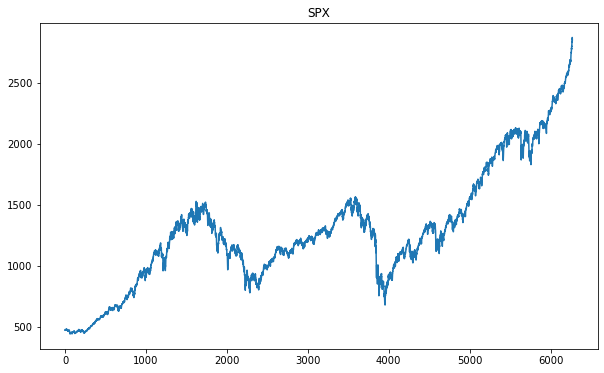

In [4]:
datin.spx.plot(figsize=(10,6),title='SPX')
plt.show()

<AxesSubplot:title={'center':'NIKKIE'}>

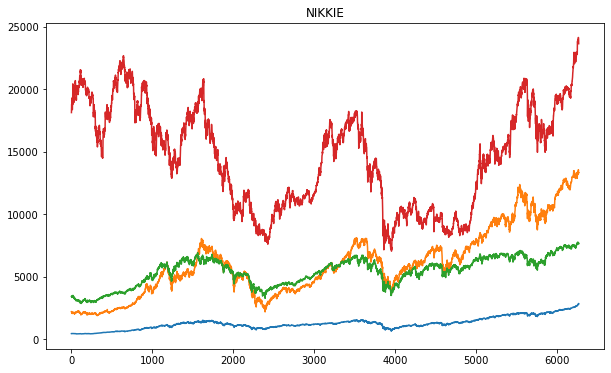

In [5]:
datin.spx.plot(figsize=(10,6),title='SPX')
datin.dax.plot(figsize=(10,6),title='DAX')
datin.ftse.plot(figsize=(10,6),title='FTSE')
datin.nikkei.plot(figsize=(10,6),title='NIKKIE')

In [6]:
import scipy.stats
import pylab

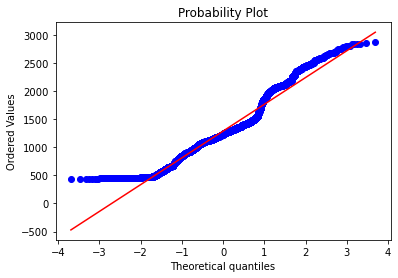

In [7]:
scipy.stats.probplot(datin.spx,plot=pylab)
pylab.show()

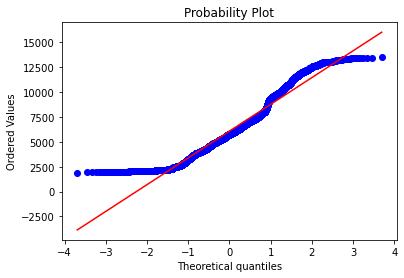

In [8]:
scipy.stats.probplot(datin.dax,plot=pylab)
pylab.show()

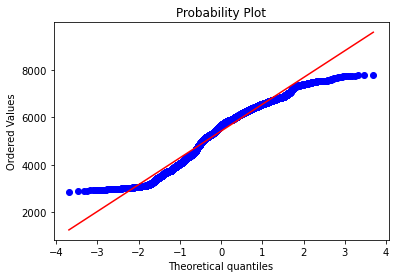

In [9]:
scipy.stats.probplot(datin.ftse,plot=pylab)
pylab.show()

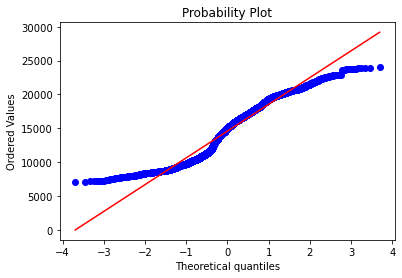

In [10]:
scipy.stats.probplot(datin.nikkei,plot=pylab)
pylab.show()

In [11]:
datin.date=pd.to_datetime(datin.date,dayfirst=True)

In [12]:
datin.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [13]:
datin.set_index("date",inplace=True)


In [14]:
datin

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


White Nose

In [15]:
import numpy as np
wn=np.random.normal(loc=datin.spx.mean(),scale=datin.spx.std(),size=len(datin))

In [16]:
datin['wn']=wn

<AxesSubplot:title={'center':'white nose'}, xlabel='date'>

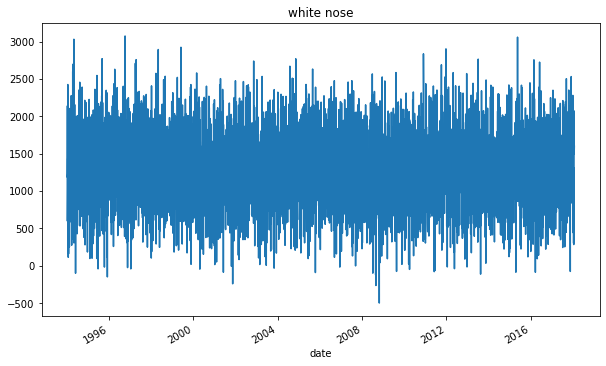

In [17]:
datin.wn.plot(figsize=(10,6),title="white nose")

(-500.0, 3000.0)

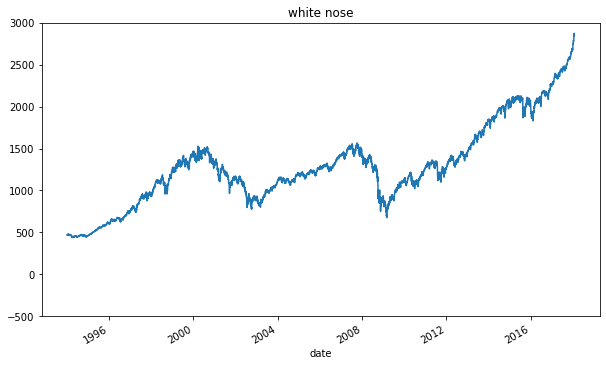

In [18]:
datin.spx.plot(figsize=(10,6),title="white nose")
plt.ylim(-500,3000)

In [19]:
df=datin['spx']
df

date
1994-01-07     469.900000
1994-01-10     475.270000
1994-01-11     474.130000
1994-01-12     474.170000
1994-01-13     472.470000
                 ...     
2018-01-23    2839.130362
2018-01-24    2837.544008
2018-01-25    2839.253031
2018-01-26    2872.867839
2018-01-29    2853.528411
Name: spx, Length: 6269, dtype: float64

In [20]:
import statsmodels.tsa.stattools as sts

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
sts.adfuller(df)

(1.072404202703652,
 0.9949740839827675,
 18,
 6250,
 {'1%': -3.4313967180469573,
  '5%': -2.862002556554404,
  '10%': -2.5670162159104},
 50197.90170692382)

In [23]:
sts.adfuller(datin.wn)

(-57.12887249199802,
 0.0,
 1,
 6267,
 {'1%': -3.4313938775326336,
  '5%': -2.862001301519361,
  '10%': -2.5670155478252497},
 94796.15265532666)

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
s_dec_add=seasonal_decompose(datin.spx,model="additive",freq=52)

C:\ana\envs\effyis2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


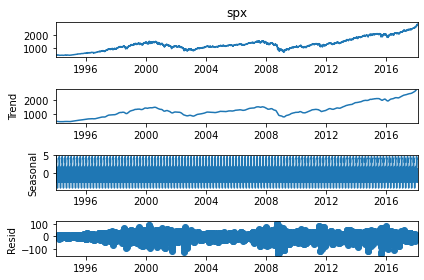

In [26]:
s_dec_add.plot()
plt.show()

In [27]:
s_dec_mul=seasonal_decompose(datin.spx,model="multiplicative",freq=52)

C:\ana\envs\effyis2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


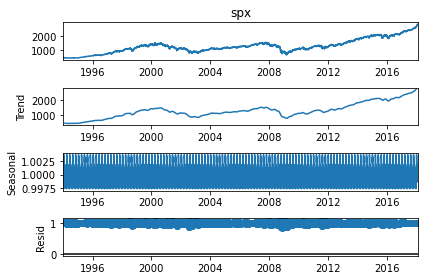

In [28]:
s_dec_mul.plot()
plt.show()

In [29]:
import statsmodels.graphics.tsaplots as sgt

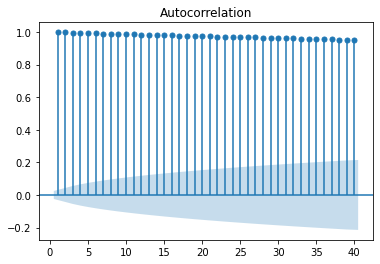

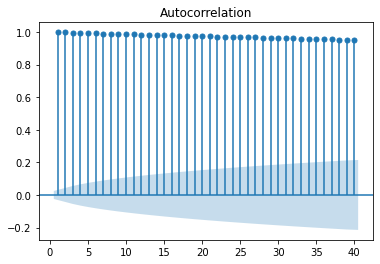

In [30]:
sgt.plot_acf(datin.spx,lags=40,zero=False)

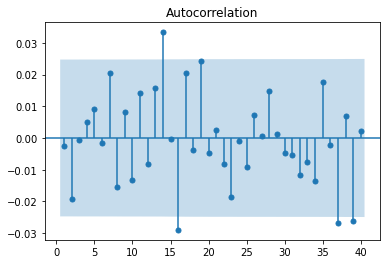

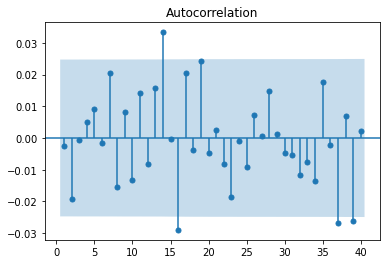

In [31]:
sgt.plot_acf(datin.wn,lags=40,zero=False)

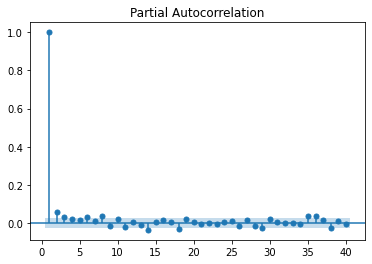

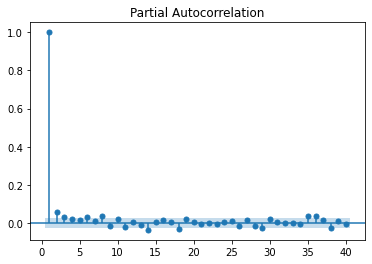

In [32]:
sgt.plot_pacf(datin.spx,lags=40,zero=False,method=('ols'))

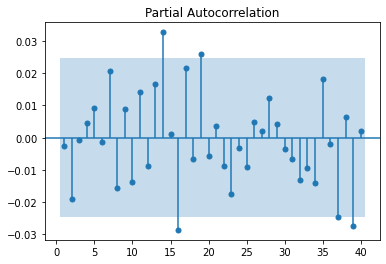

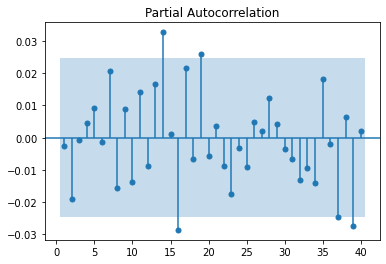

In [33]:
sgt.plot_pacf(datin.wn,lags=40,zero=False,method=('ols'))

ACF OF FTSE

In [34]:
import statsmodels.graphics.tsaplots as sgt

In [35]:
datin.head()

,spx,dax,ftse,nikkei,wn
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,604.133366
1994-01-10,475.27,2225.00,3440.58,18443.44,1028.803828
1994-01-11,474.13,2228.10,3413.77,18485.25,1476.991806
1994-01-12,474.17,2182.06,3372.02,18793.88,1216.349637
1994-01-13,472.47,2142.37,3360.01,18577.26,2138.647711


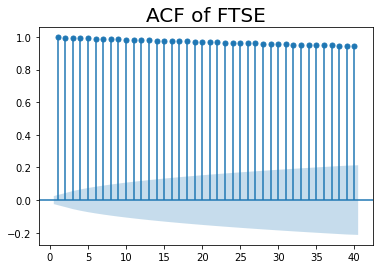

In [36]:
sgt.plot_acf(datin.ftse,lags=40,zero=False)
plt.title('ACF of FTSE', size=20)
plt.show()


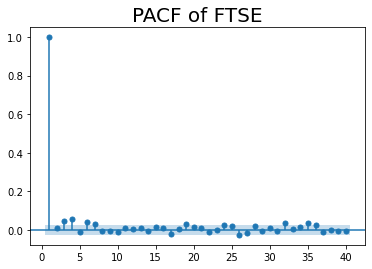

In [37]:
sgt.plot_pacf(datin.ftse,lags=40,zero=False,method=('ols'))
plt.title('PACF of FTSE', size=20)
plt.show()


since the highest value of PACF IS one , we choose to implement AR of param 1

#AR(1) of FTSE


In [38]:
from  statsmodels.tsa.arima_model import ARMA

In [39]:
model_ar=ARMA(datin.ftse,order=(1,0))

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
result_ar=model_ar.fit()

In [41]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                     ARMA(1, 0)   Log Likelihood              -34398.227
Method:                       css-mle   S.D. of innovations             58.416
Date:                Tue, 08 Sep 2020   AIC                          68802.453
Time:                        12:41:40   BIC                          68822.683
Sample:                             0   HQIC                         68809.463
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5830.6678    884.720      6.590      0.000    4096.649    7564.687
ar.L1.ftse     0.9991      0.001   1494.946      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

Higher-Lag ARMA models

In [42]:
model_ar2=ARMA(datin.ftse,order=(2,0))
result_ar2=model_ar2.fit()
result_ar2.summary()


C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                     ARMA(2, 0)   Log Likelihood              -34398.012
Method:                       css-mle   S.D. of innovations             58.414
Date:                Tue, 08 Sep 2020   AIC                          68804.024
Time:                        12:41:42   BIC                          68830.997
Sample:                             0   HQIC                         68813.370
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5840.7920    906.727      6.442      0.000    4063.640    7617.944
ar.L1.ftse     0.9907      0.013     78.856      0.000       0.966       1.015
ar.L2.ftse     0.0084      0.013      0.670      0.503      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2         -118.6912           +0.0000j          118.6912            0.5000
-----------------------------------------------------------------------------
"""

In [43]:
model_ar3=ARMA(datin.ftse,order=(3,0))
result_ar3=model_ar3.fit()
result_ar3.summary()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                     ARMA(3, 0)   Log Likelihood              -34390.948
Method:                       css-mle   S.D. of innovations             58.349
Date:                Tue, 08 Sep 2020   AIC                          68791.895
Time:                        12:41:43   BIC                          68825.612
Sample:                             0   HQIC                         68803.578
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5422.7140    707.035      7.670      0.000    4036.951    6808.477
ar.L1.ftse     0.9903      0.013     78.861      0.000       0.966       1.015
ar.L2.ftse    -0.0381      0.018     -2.153      0.031      -0.073      -0.003
ar.L3.ftse     0.0470      0.013      3.721      0.000       0.022       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -0.0943           -4.6117j            4.6127           -0.2533
AR.3           -0.0943           +4.6117j            4.6127            0.2533
-----------------------------------------------------------------------------
"""

In [44]:
from scipy.stats.distributions import chi2

In [45]:
def LLR(mod1,mod2,DF=1):
    l1=mod1.fit().llf
    l2=mod2.fit().llf
    LR=(2*(l2-l1))
    p=chi2.sf(LR,DF).round(3)
    return p
    
    

In [46]:
LLR(model_ar2,model_ar3)

0.0

In [47]:
model_ar4=ARMA(datin.ftse,order=(4,0))
result_ar4=model_ar4.fit()
result_ar4.summary()
LLR(model_ar3,model_ar4)

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0.0

AR on non stationar Data using Residuals

In [48]:
datin.head()

,spx,dax,ftse,nikkei,wn
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,604.133366
1994-01-10,475.27,2225.00,3440.58,18443.44,1028.803828
1994-01-11,474.13,2228.10,3413.77,18485.25,1476.991806
1994-01-12,474.17,2182.06,3372.02,18793.88,1216.349637
1994-01-13,472.47,2142.37,3360.01,18577.26,2138.647711


In [49]:
sts.adfuller(datin.ftse)

(-1.5942821597949688,
 0.48646513020568627,
 6,
 6262,
 {'1%': -3.4313947113763845,
  '5%': -2.862001669939781,
  '10%': -2.5670157439442236},
 68396.51796279417)

Using returns to trasform FTSE to stationar data

In [50]:
datin['returns_FTSE']=datin.ftse.pct_change(1).mul(100)

In [51]:
datin

,spx,dax,ftse,nikkei,wn,returns_FTSE
date,,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,604.133366,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44,1028.803828,-0.156704
1994-01-11,474.130000,2228.10,3413.770000,18485.25,1476.991806,-0.779229
1994-01-12,474.170000,2182.06,3372.020000,18793.88,1216.349637,-1.222988
1994-01-13,472.470000,2142.37,3360.010000,18577.26,2138.647711,-0.356166
...,...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,774.260077,0.212382
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,1229.229013,-1.143311
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,2070.545519,-0.360951


In [52]:
df_ftes=datin['returns_FTSE'].iloc[1:]

In [53]:
sts.adfuller(df_ftes)

(-15.182022490939033,
 6.178382600319977e-28,
 34,
 6233,
 {'1%': -3.4313995740622145,
  '5%': -2.8620038184370746,
  '10%': -2.567016887640913},
 19014.128593790985)

AR(1) for returns of FTSE

In [54]:
model_ret_1=ARMA(df_ftes,order=(1,0))
result_ret_1=model_ret_1.fit()
result_ret_1.summary()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           returns_FTSE   No. Observations:                 6268
Model:                     ARMA(1, 0)   Log Likelihood               -9589.507
Method:                       css-mle   S.D. of innovations              1.117
Date:                Tue, 08 Sep 2020   AIC                          19185.014
Time:                        12:47:40   BIC                          19205.244
Sample:                             0   HQIC                         19192.024
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0190      0.014      1.371      0.170      -0.008       0.046
ar.L1.returns_FTSE    -0.0172      0.013     -1.364      0.173      -0.042       0.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -58.0661           +0.0000j           58.0661            0.5000
-----------------------------------------------------------------------------
"""

HIGHER-lag AR models for returns !!


model_ret_2=ARMA(df_ftes,order=(2,0))
result_ret_2=model_ret_2.fit()
result_ret_2.summary()

In [55]:
model_ret_2=ARMA(df_ftes,order=(2,0))
result_ret_2=model_ret_2.fit()
result_ret_2.summary()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           returns_FTSE   No. Observations:                 6268
Model:                     ARMA(2, 0)   Log Likelihood               -9582.177
Method:                       css-mle   S.D. of innovations              1.116
Date:                Tue, 08 Sep 2020   AIC                          19172.354
Time:                        13:05:03   BIC                          19199.327
Sample:                             0   HQIC                         19181.700
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0190      0.013      1.439      0.150      -0.007       0.045
ar.L1.returns_FTSE    -0.0181      0.013     -1.431      0.152      -0.043       0.007
ar.L2.returns_FTSE    -0.0483      0.013     -3.831      0.000      -0.073      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1868           -4.5449j            4.5488           -0.2565
AR.2           -0.1868           +4.5449j            4.5488            0.2565
-----------------------------------------------------------------------------
"""

In [56]:
model_ret_3=ARMA(df_ftes,order=(3,0))
result_ret_3=model_ret_3.fit()
result_ret_3.summary()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           returns_FTSE   No. Observations:                 6268
Model:                     ARMA(3, 0)   Log Likelihood               -9568.117
Method:                       css-mle   S.D. of innovations              1.114
Date:                Tue, 08 Sep 2020   AIC                          19146.233
Time:                        13:05:20   BIC                          19179.949
Sample:                             0   HQIC                         19157.916
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0190      0.012      1.540      0.124      -0.005       0.043
ar.L1.returns_FTSE    -0.0213      0.013     -1.690      0.091      -0.046       0.003
ar.L2.returns_FTSE    -0.0495      0.013     -3.936      0.000      -0.074      -0.025
ar.L3.returns_FTSE    -0.0669      0.013     -5.309      0.000      -0.092      -0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9743           -2.1469j            2.3576           -0.1822
AR.2            0.9743           +2.1469j            2.3576            0.1822
AR.3           -2.6892           -0.0000j            2.6892           -0.5000
-----------------------------------------------------------------------------
"""

In [57]:
model_ret_6=ARMA(df_ftes,order=(6,0))
result_ret_6=model_ret_6.fit()
result_ret_6.summary()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           returns_FTSE   No. Observations:                 6268
Model:                     ARMA(6, 0)   Log Likelihood               -9550.065
Method:                       css-mle   S.D. of innovations              1.110
Date:                Tue, 08 Sep 2020   AIC                          19116.130
Time:                        13:05:36   BIC                          19170.076
Sample:                             0   HQIC                         19134.822
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0191      0.012      1.646      0.100      -0.004       0.042
ar.L1.returns_FTSE    -0.0197      0.013     -1.561      0.119      -0.044       0.005
ar.L2.returns_FTSE    -0.0508      0.013     -4.035      0.000      -0.076      -0.026
ar.L3.returns_FTSE    -0.0716      0.013     -5.680      0.000      -0.096      -0.047
ar.L4.returns_FTSE     0.0271      0.013      2.147      0.032       0.002       0.052
ar.L5.returns_FTSE    -0.0593      0.013     -4.705      0.000      -0.084      -0.035
ar.L6.returns_FTSE    -0.0375      0.013     -2.970      0.003      -0.062      -0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2968           -0.9261j            1.5935           -0.0987
AR.2            1.2968           +0.9261j            1.5935            0.0987
AR.3           -0.1123           -1.5874j            1.5914           -0.2612
AR.4           -0.1123           +1.5874j            1.5914            0.2612
AR.5           -1.9754           -0.4960j            2.0367           -0.4608
AR.6           -1.9754           +0.4960j            2.0367            0.4608
-----------------------------------------------------------------------------
"""

Normalizing Values

In [58]:
datin.head()

,spx,dax,ftse,nikkei,wn,returns_FTSE
date,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,604.133366,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,1028.803828,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,1476.991806,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,1216.349637,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,2138.647711,-0.356166


In [65]:
df_ftse=datin['ftse']
benchmark=df_ftse.iloc[0]


In [66]:
datin['ftse_normal']=datin['ftse'].div(benchmark).mul(100)

In [67]:
sts.adfuller(datin.ftse_normal)

(-1.594282159795191,
 0.48646513020557475,
 6,
 6262,
 {'1%': -3.4313947113763845,
  '5%': -2.862001669939781,
  '10%': -2.5670157439442236},
 24262.373511811085)

Normalizing values of returns 

In [75]:
df_ftse_ret=datin['returns_FTSE']
benchmark=df_ftse_ret.iloc[0]


In [76]:
benchmark

nan

In [78]:
datin['returns_FTSE'].div(benchmark).mul(100)
len(datin['returns_FTSE'])

6269

In [80]:
datin.head()

,spx,dax,ftse,nikkei,wn,returns_FTSE,spx_norm=,spx_normal,ftse_normal,ftse_returns_normal
date,,,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,604.133366,NaN,100.000000,100.000000,100.000000,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,1028.803828,-0.156704,101.142796,101.142796,99.843296,100.000000
1994-01-11,474.13,2228.10,3413.77,18485.25,1476.991806,-0.779229,100.900192,100.900192,99.065288,497.260711
1994-01-12,474.17,2182.06,3372.02,18793.88,1216.349637,-1.222988,100.908704,100.908704,97.853731,780.443046
1994-01-13,472.47,2142.37,3360.01,18577.26,2138.647711,-0.356166,100.546925,100.546925,97.505209,227.285567


In [83]:
datin.ftse_returns_normal.iloc[1:]

date
1994-01-10    100.000000
1994-01-11    497.260711
1994-01-12    780.443046
1994-01-13    227.285567
1994-01-14   -770.139292
                 ...    
2018-01-23   -135.530649
2018-01-24    729.597320
2018-01-25    230.338698
2018-01-26   -416.456135
2018-01-29    -49.882539
Name: ftse_returns_normal, Length: 6268, dtype: float64

In [84]:
sts.adfuller(datin.ftse_returns_normal.iloc[1:])

(-15.182022490939042,
 6.178382600319799e-28,
 34,
 6233,
 {'1%': -3.4313995740622145,
  '5%': -2.8620038184370746,
  '10%': -2.567016887640913},
 99526.59564124081)

In [85]:
datin

,spx,dax,ftse,nikkei,wn,returns_FTSE,spx_norm=,spx_normal,ftse_normal,ftse_returns_normal
date,,,,,,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,604.133366,NaN,100.000000,100.000000,100.000000,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44,1028.803828,-0.156704,101.142796,101.142796,99.843296,100.000000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,1476.991806,-0.779229,100.900192,100.900192,99.065288,497.260711
1994-01-12,474.170000,2182.06,3372.020000,18793.88,1216.349637,-1.222988,100.908704,100.908704,97.853731,780.443046
1994-01-13,472.470000,2142.37,3360.010000,18577.26,2138.647711,-0.356166,100.546925,100.546925,97.505209,227.285567
...,...,...,...,...,...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,774.260077,0.212382,604.198843,604.198843,224.372393,-135.530649
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,1229.229013,-1.143311,603.861249,603.861249,221.807119,729.597320
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,2070.545519,-0.360951,604.224948,604.224948,221.006505,230.338698


AR models for normalized returns !!

In [88]:
model_ret_n_1=ARMA(datin.ftse_returns_normal.iloc[1:],order=(1,0))
result_ret_n_1=model_ret_n_1.fit()
result_ret_n_1.summary()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     ftse_returns_normal   No. Observations:                 6268
Model:                      ARMA(1, 0)   Log Likelihood              -50071.791
Method:                        css-mle   S.D. of innovations            713.043
Date:                 Tue, 08 Sep 2020   AIC                         100149.581
Time:                         13:42:05   BIC                         100169.811
Sample:                              0   HQIC                        100156.591
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -12.1354      8.854     -1.371      0.170     -29.489       5.218
ar.L1.ftse_returns_normal    -0.0172      0.013     -1.364      0.173      -0.042       0.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -58.0666           +0.0000j           58.0666            0.5000
-----------------------------------------------------------------------------
"""

Analysing the residuals

In [90]:
model_ar7=ARMA(datin.returns_FTSE,order=(7,0))
result_7=model_ar7.fit()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [91]:
datin['res_price']=result_7.resid

In [92]:
datin['res_price'].mean()

0.4791630849941675

In [93]:
datin['res_price'].var()

4008.759525584561

In [94]:
sts.adfuller(datin.res_price)

(-86.10395690045445,
 0.0,
 0,
 6268,
 {'1%': -3.4313937109235875,
  '5%': -2.862001227905827,
  '10%': -2.5670155086390123},
 68384.81292290395)

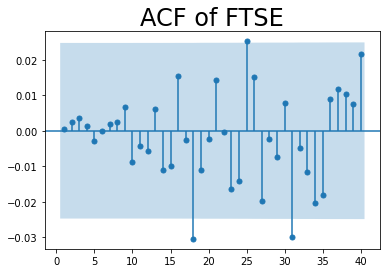

In [96]:
sgt.plot_acf(datin.res_price,lags=40,zero=False)
plt.title('ACF of FTSE', size=24)
plt.show()

<AxesSubplot:title={'center':'white nose'}, xlabel='date'>

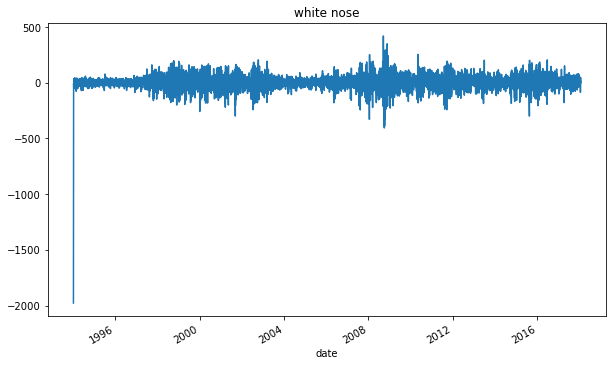

In [97]:
datin.res_price.plot(figsize=(10,6),title="white nose")


In [103]:
model_ar6=ARMA(datin.returns_FTSE.iloc[1:],order=(6,0))
result_6=model_ar6.fit()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [104]:
datin['res_ret']=result_6.resid
datin['res_ret'].mean()

-4.109223444027482e-05

In [105]:
datin['res_ret'].var()

1.2330905509937096